# PREDICT HOTEL BOOKING CANCELLATIONS

**Group T**

Group members:
- David Castro : 20220688
- Denzel Basso : 20220671
- Francisco Freitas : 20220694
- Giulia Bovenga : 20221637
- Nevena Cukrov : 20221373

<div class="alert alert-block alert-info">

# Index
    
[1. Dataset description](#1)<br>
[2. Import libraries](#2)<br>
[3. Data Understanding](#3)<br>
[4. Data Preparation](#4)<br>
[5. Modelling](#5)<br>
[6. Analysis](#6)<br>  

</div>

<a class="anchor" id="1">

# 1. Dataset description
    
</a>


**ADR**: Average Daily Rate

**Adults**: Number of adults

**Agent**: ID of the travel agency that made the booking

**ArrivalDateDayOfMonth**: Day of the month of the arrival date

**ArrivalDateMonth**: Month of arrival date with 12 categories:
- “January” to “December”

**ArrivalDateWeekNumber**: Week number of the arrival date

**ArrivalDateYear**: Year of the arrival date

**AssignedRoomType**: Code for the type of room assigned to the
booking. Sometimes the assigned room type differs from the
reserved room type due to hotel operation reasons (e.g.
overbooking) or by customer request. Code is presented instead of
designation for anonymity reasons

**Babies**: Number of babies

**BookingChanges**: Number of changes/amendments made to the
booking from the moment the booking was entered on the PMS
until the moment of check-in or cancellation

**Children**: Number of children

**Company**: ID of the company/entity that made the booking or is
responsible for paying the booking. ID is presented instead of
designation for anonymity reasons

**Country**: Country of origin. Categories are represented in the ISO 3155-3:2013
format

**CustomerType**: Type of booking, assuming one of four categories:
- Contract: when the booking has an allotment or other type of contract associated to it;
- Group: when the booking is associated to a group;
- Transient: when the booking is not part of a group or contract, and is not associated to other transient booking;
- Transient-party: when the booking is transient, but is associated to at least other transient booking

**DaysInWaitingList**: Number of days the booking was in the waiting list before
it was confirmed to the customer

**DepositType**: Indication if the customer made a deposit to guarantee the
booking. This variable can assume three categories:
- No Deposit:  no deposit was made;
- Non Refund:  a deposit was made in the value of the total stay cost;
- Refundable:  a deposit was made with a value under the total cost of the stay.

**DistributionChannel**: Booking distribution channel. The term “TA” means
“Travel Agents” and “TO” means “Tour Operators”

**IsCanceled**: Value indicating if the booking was canceled (1) or not (0)

**IsRepeatedGuest**: Value indicating if the booking name was from a repeated
guest (1) or not (0)

**LeadTime**: Number of days that elapsed between the entering date of the
booking into the PMS and the arrival date

**MarketSegment**: Market segment designation. In categories, the term “TA”
means “Travel Agents” and “TO” means “Tour Operators”

**Meal**: Type of meal booked. Categories are presented in standard hospitality
meal packages:
- Undefined/SC:  no meal package;
- BB: Bed & Breakfast;
- HB: Half board (breakfast and one other meal – usually dinner);
- FB: Full board (breakfast, lunch and dinner)

**PreviousBookingsNotCanceled**: Number of previous bookings not cancelled
by the customer prior to the current booking

**PreviousCancellations**: Number of previous bookings that were cancelled by
the customer prior to the current booking

**RequiredCarParkingSpaces**: Number of car parking spaces required by the
customer

**ReservationStatus**: Reservation last status, assuming one of three categories:
- Canceled: booking was canceled by the customer;
- Check-Out: customer has checked in but already departed;
- No-Show: customer did not check-in and did inform the hotel of the reason why

**ReservationStatusDate**: Date at which the last status was set. This variable
can be used in conjunction with the ReservationStatus to understand when
was the booking canceled or when did the customer checked-out of the hotel

**ReservedRoomType**: Code of room type reserved. Code is presented instead
of designation for anonymity reasons

**StaysInWeekendNights**: Number of weekend nights (Saturday or Sunday) the
guest stayed or booked to stay at the hotel

**StaysInWeekNights**: Number of weeknights (Monday to Friday) the guest
stayed or booked to stay at the hotel

**TotalOfSpecialRequests**: Number of special requests made by the customer
(e.g. twin bed or high floor)

<a class="anchor" id="2">

# 2. Import libreries
    
</a>

In [22]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import plotly.express as px
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx

<a class="anchor" id="3">

# 3. Data Understanding
    
</a>

In [23]:
# Load data 
data = pd.read_csv('Case4_H2.csv', delimiter=",")
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [24]:
#shape
data.shape

(79330, 31)

In [25]:
#Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [26]:
#Compute summary statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,NaN,NaN,NaN,0.41727,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,NaN,NaN,NaN,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,NaN,NaN,NaN,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330.0,NaN,NaN,NaN,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,NaN,NaN,NaN,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,NaN,NaN,NaN,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,NaN,NaN,NaN,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,NaN,NaN,NaN,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,NaN,NaN,NaN,0.09137,0.372177,0.0,0.0,0.0,0.0,3.0


Possible outlier to check later in:
- LeadTime
- StaysInWeekendNights
- StaysInWeekNights
- BookingChanges
- DaysInWaitingList
- TotalOfSpecialRequests

First impressions:

- the 50% of the booking is cancelled
- Leadtime: on average, customers book 109 days in advance. The minimum is 0 (same day) and the biggest value is 629 (1.7 years before)
- ArrivalDateYear: as anticièpated, the oldest record is from 2015 while the most recent is from 2017
- ArrivalDateMonth: the month with more booking is August
- ArrivalDateDayOfMonth: bookings seem evenly distributed throughout the month, with no obvious peeks for the time being
- StaysInWeekendNights: maximum number is 16?? Are they consecutive weekends?
- StaysInWeekNights: on average is 2 but the maximum number is 41. Could it be a company that made a reservation for several rooms due to conference and that they are all registered with this account?
- the biggest value for babies is 10 :/
- Meal: the majority of type of meal booked is BB (Bed & Breakfast)
- PreviousCancellations: the max number is 21

Information from the papers:
- The PMS assured no missing data exists in its database tables. However, in some categorical variables like Agent or Company, “**NULL**” is presented as one of the categories. **This should not be considered a missing value**, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.
- All four hotels are four-star and five- star resort hotels, ranging in size from 86 to 180 rooms. All four hotels have at least one bar and one restaurant. --> for marketing ideas

In [27]:
#Check missing values
data.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

Observation: missing value in Children 4, Country 24

In [28]:
data['ArrivalDateYear'].value_counts()

2016    38140
2017    27508
2015    13682
Name: ArrivalDateYear, dtype: int64

Observation: the year 2016 contains 46% of the data

In [29]:
data.groupby('ArrivalDateYear').sum()

,IsCanceled,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
ArrivalDateYear,,,,,,,,,,,,,,,,,
2015,6004,1446828,541943,214819,10375,27124,24385,512.0,84,507,3757,386,1933,40572,1174694.31,203,4458
2016,15407,4122932,1099898,605858,29627,83394,70568,3814.0,195,915,2209,5898,7323,209752,3946867.66,1199,21044
2017,11691,3135575,514146,431676,23080,62656,51885,2922.0,113,610,360,4217,5608,5656,3232241.27,531,17885


Observation: the proportion of ArrivalDateYear compared to the nunber of cancellation IsCanceled is
- 2015: 43,8%
- 2016: 40%
- 2017: 42,4%

In [30]:
data['ArrivalDateMonth'].value_counts()

August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: ArrivalDateMonth, dtype: int64

Observation:
- from May to August we have the the highest affluence (summer season)
- from November to February we have the lowest affluence (winter season)

In [31]:
data.groupby('ArrivalDateMonth').sum().sort_values(by='IsCanceled',ascending=False)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
ArrivalDateMonth,,,,,,,,,,,,,,,,,,
May,3653,956348,16600268,166693,132241,6045,17322,14958,489.0,17,203,171,1316,1524,50720,1001328.63,128,4318
August,3602,1174523,18110373,300260,141184,7539,20852,17841,1499.0,61,137,864,554,2224,5533,1030174.53,375,5786
June,3528,981595,15918275,194063,120120,5521,17257,14519,569.0,28,155,202,1262,1283,19877,939972.85,148,4115
April,3465,741414,15083599,119345,120547,6398,16391,14290,787.0,24,105,426,678,1223,32277,832163.75,160,4015
July,3306,1242233,16307569,234327,129565,7346,18054,15975,1193.0,35,216,818,1263,1519,2899,895618.95,210,4934
October,3268,957114,15328294,321775,116137,5888,14997,13665,434.0,34,230,886,614,1016,44459,760306.06,112,3794
September,3110,945979,14914871,282101,119508,5656,15036,13569,351.0,41,149,992,580,1278,44364,814034.49,128,3491
March,2386,472485,13022740,74781,105827,4958,14761,11858,444.0,31,183,236,896,1193,11837,598289.24,177,3374
February,1901,262228,10012034,37122,79750,4161,10664,8846,499.0,31,146,489,701,890,5546,422463.30,131,2555


## Churn rate per month
**January** 39%
**February** 38%
**March** 36%
**April** 46%
**May** 44%
**June** 44%

**July** 40%
**August** 40%
**September** 42%
**October** 42%
**November** 38%
**December** 42%

In [26]:
data['PreviousCancellations'].value_counts()

0     73941
1      5155
2        72
3        51
11       35
4        25
6        22
5        16
13       12
21        1
Name: PreviousCancellations, dtype: int64

Observation: majourity of previous cancellations are 0 (93%). The second most populated is 1 (6%), and 2 (0,09%)

In [ ]:
################################################################ Denzel: I stop putting notes from here #########################

In [28]:
data[data['PreviousCancellations']==11]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
39968,1,1,2015,December,52,24,0,1,2,0.0,...,No Deposit,NULL,NULL,0,Transient,55.00,0,0,Canceled,2015-12-23
39969,1,1,2015,December,52,24,0,1,2,0.0,...,No Deposit,NULL,NULL,0,Transient,55.00,0,0,Canceled,2015-12-23
39970,0,0,2016,January,2,7,0,1,1,0.0,...,No Deposit,9,NULL,0,Transient,77.50,1,0,Check-Out,2016-01-08
39971,0,1,2016,January,2,8,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient-Party,67.50,0,0,Check-Out,2016-01-10
39972,0,1,2016,January,2,8,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient-Party,76.50,1,0,Check-Out,2016-01-10
39973,0,1,2016,January,2,9,1,1,2,0.0,...,No Deposit,9,NULL,0,Transient,89.30,0,1,Check-Out,2016-01-11
39974,0,2,2016,January,3,12,0,2,1,0.0,...,No Deposit,9,NULL,0,Transient,82.90,0,1,Check-Out,2016-01-14
39975,0,4,2016,January,3,12,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,80.30,0,1,Check-Out,2016-01-15
39976,0,2,2016,January,3,13,0,2,1,0.0,...,No Deposit,9,NULL,0,Transient,77.50,0,0,Check-Out,2016-01-15
39977,0,3,2016,January,3,14,0,1,2,0.0,...,No Deposit,9,NULL,0,Transient,83.90,0,1,Check-Out,2016-01-15


In [ ]:
categorical = ['ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth',
               'DepositType','Agent','Company','CustomerType','ReservationStatus','ReservationStatusDate','AssignedRoomType',
               'Country','DistributionChannel','IsCanceled','IsRepeatedGuest','MarketSegment','Meal','ReservedRoomType']

numerical = ['ADR','LeadTime','StaysInWeekNights','StaysInWeekendNights','Adults','Children','Babies','PreviousCancellations',
             'PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','RequiredCarParkingSpaces',
             'TotalOfSpecialRequests']

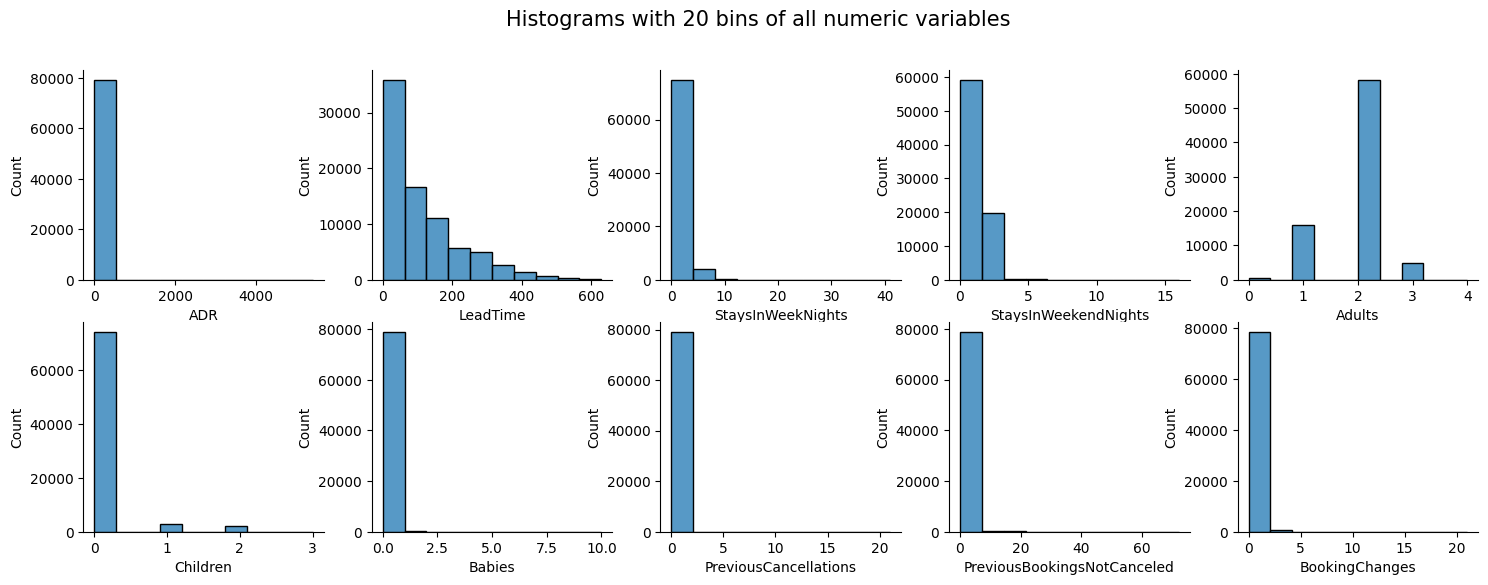

In [36]:
# HISTOGRAM (ALL NUMERIC VARIABLES)


fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(data[numerical], ax.flatten()):
    g = sns.histplot(data=data,bins=10,x=var,ax=subplot,kde=False)

sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=15);

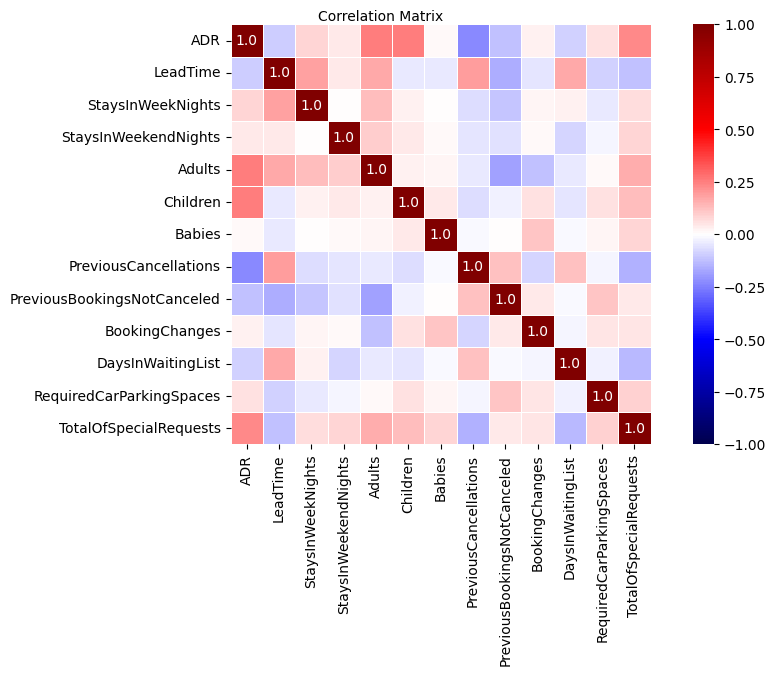

In [37]:
#CORRELATION MATRIX

fig = plt.figure(figsize = (11, 5))
corr = np.round(data[numerical].corr(method='spearman'),2)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))
sns.heatmap(data = corr, annot = annot, cmap = plt.cm.seismic, fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, 
             linewidths = 0.5)
fig.subplots_adjust(top = 0.95)
fig.suptitle("Correlation Matrix", fontsize = 10)
plt.show()

<a class="anchor" id="4">

# 4. Data Preparation
    
</a>

<a class="anchor" id="5">

# 5. Modeling
    
</a>

<a class="anchor" id="6">

# 6. Analysis
    
</a>